# MCMC ASSIGNMENT 1, ARMEET,200185

# Q1: DISCRETE INVERSE TRANSFORM SAMPLER FOR POISSON

stdin> 45
enter lambda of poison
Mean of sample : 45.0469 Variance of sample : 45.1948198719872
Density Mean : 45.0786 Density Variance : 44.60068210821081


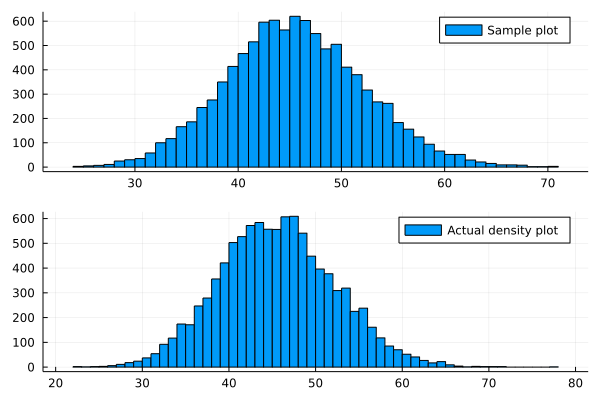

In [2]:
function xreturn(lambda) ##fxn to return a RV of poison distribution
  val = rand()
  p0 = exp(-lambda)
  sum_l = 0.0
  sum_h = 0.0
  x = floor(lambda)
  for i = 0:x-1
    sum_l += p0
    p0 = (lambda / (i + 1)) * p0
  end
  sum_h = sum_l + p0

  while (true)


    if (sum_l < val <= sum_h)
      break
    elseif val > sum_h
      p0 = (lambda / (x + 1)) * p0
      x = x + 1
      sum_l = sum_h
      sum_h = sum_h + p0
    else
      x = x - 1
      p0 = ((x + 1) / lambda) * p0
      sum_h = sum_l
      sum_l = sum_l - p0

    end
  end
  return x

end

using Statistics
using Plots
using Distributions

##Calling m samples from Poison distribution
m=10000

println("enter lambda of poison")
lambda = readline();
X = zeros(1, m)

lambda = parse(Float64, lambda);
for i = 1:m
  X[i] = xreturn(lambda)
end
d = Poisson(lambda)
Y = rand(d, m)
Z = [X[1:m], Y[1:m]];

println("Mean of sample : ", mean(X), " Variance of sample : ", var(X));
println("Density Mean : ", mean(Y), " Density Variance : ", var(Y));
# P1=histogram(X[1:10000],label="Sample plot",show=true)

# P2=histogram(Y[1:10000],label="Actual density plot",show=true)
histogram(Z, layout=(2, 1), label=["Sample plot" "Actual density plot"], plot=true, show=true)




# Output for lambda=13

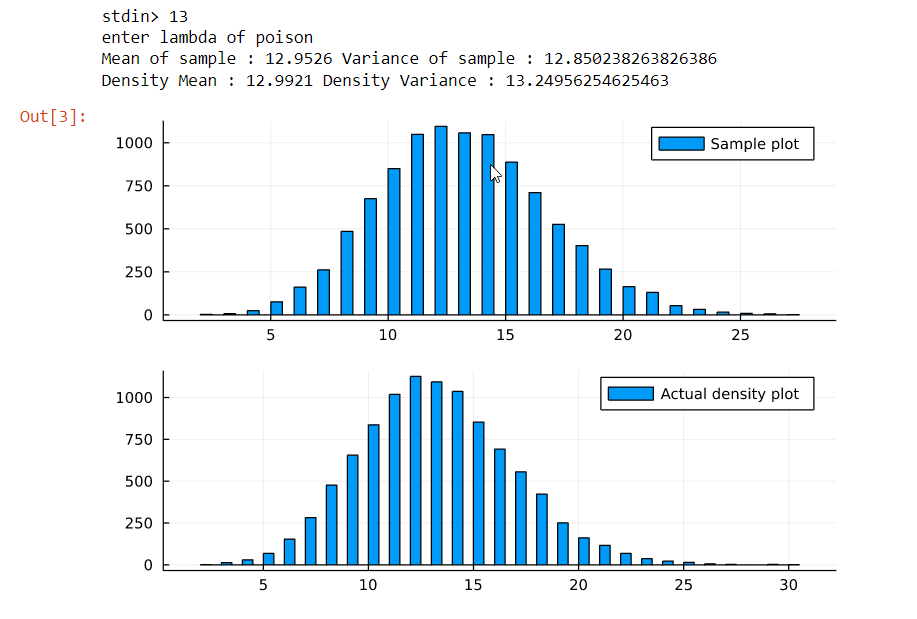

# Q2: DISCRETE ACCEPT REJECT

stdin> 24
stdin> 34
stdin> 0.9
enter lambda of poison
enter n of binomial
enter p of binomial
Mean of sample : 30.692 Variance of sample : 3.272408408408408
Density Mean : 30.598 Density Variance : 2.6470430430430447


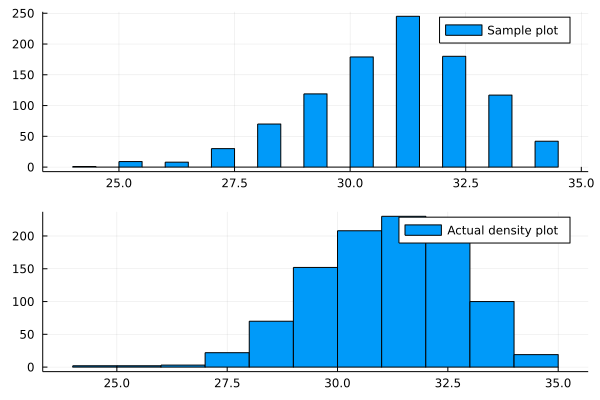

In [1]:
using Plots
using Statistics
using Distributions
function creturn(n, p, lambda)

    k = ((1 - p) / p) * lambda
    c = n - k
    d = floor(Int64, c)
    if c != floor(c)
        d = floor(Int64, c) + 1
    end
    if c < 0
        d = 0
    end
    cval = exp(lambda) * ((1 - p)^n) * binomial(n, d) * ((p / (1 - p))^d) * factorial(big(d)) / (lambda^d)
    return cval

end


function areject(n, p, lambda, c)

    while (true)
        u = rand()
        d = Poisson(lambda)
        prop = rand(d)
        p1 = binomial(n, prop) * (p^prop) * ((1 - p)^(n - prop))
        q1 = exp(-lambda) * (lambda^(prop)) / factorial(big(prop))

        if (u < (p1 / (q1 * c)))
            return prop
        end
    end

end

##Calling m samples of custom Binomial distribution
m=1000;

c = 0;

println("enter lambda of poison")
lambda = readline();
println("enter n of binomial")
n = readline();
println("enter p of binomial")
p = readline();

lambda = parse(Float64, lambda);
n = parse(Int64, n);
p = parse(Float64, p);

X = zeros(1, m)
c = creturn(n, p, lambda);
c = c + 0.001;
for i = 1:m
    X[i] = areject(n, p, lambda, c)
end
d = Binomial(n, p)
Y = rand(d, m)
Z = [X[1:m], Y[1:m]];
println("Mean of sample : ", mean(X), " Variance of sample : ", var(X));
println("Density Mean : ", mean(Y), " Density Variance : ", var(Y));
histogram(Z, layout=(2, 1), label=["Sample plot" "Actual density plot"], plot=true, show=true)


# Output for lambda=12,n=25,p=0.69

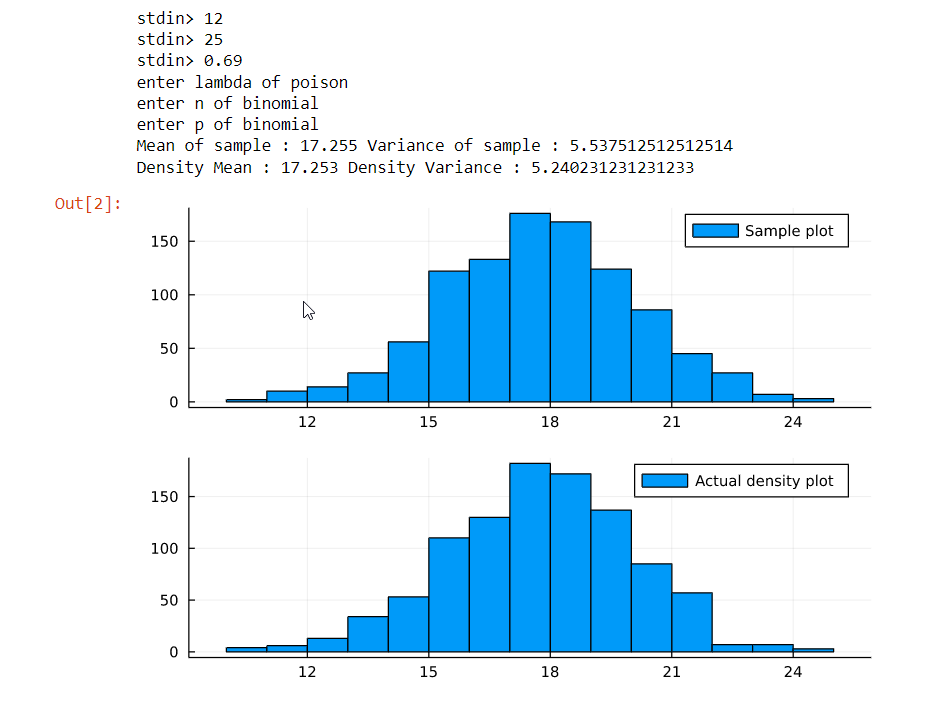